### Student Information
Name:

Student ID:R14K47024

GitHub ID:IvyChouCandy

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### >>> **Set up**

In [4]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

### >>> **Exercise 1 :**

In [5]:
#load data
original_dataDf = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
#see data
print(len(original_dataDf))

###Exercise 1 :print out the text data for the first three samples in the dataset.
for i in range(3):
    print(f"example{i+1}:")
    print("\n".join(original_dataDf["text"][i].split("\n")))

847
example1:
Calls on retards
example2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example3:
Seeing lots of red in the ticker.


### >>> **Exercise 2:**

In [6]:
###Exercise 2 :query the last 10 records
print(original_dataDf["text"].tail(10))

837               Finance media lying \r\n\r\n*Surprise*
838                                          I am all in
839                                 The Art of the Deal‚Ä¶
840                                               Lol fr
841    So countries ‚Äúbegging to stop the tariffs‚Äù and...
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, dtype: object


### >>> **Exercise 4:**

In [7]:
###Exercise 4:check missing values
original_dataDf.isnull().apply(lambda x:dmh.check_missing_values(x))
#Âè™ÊúâÂú®"downvotes"Âèä"upvote_ratio"Ê¨Ñ‰ΩçÊúâÁº∫Â§±ÂÄºÔºå‰ΩÜÈÄôÂÖ©ÂÄãÊ¨Ñ‰Ωç‰∏çÊòØ‰∏ªË¶ÅÂú®pahse 1Ë¶ÅÂàÜÊûêÁöÑÊ¨Ñ‰Ωç

type  ...                               label
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 16 columns]

### >>> **Exercise 5:**

In [8]:
###Exercise 5:check string type missing values
#check "text"„ÄÅ"sentiment" and "label"(Á¢∫Ë™çÊòØÂê¶Âê´Êúâstring typeÁöÑÁ©∫ÂÄºÔºåÂè™Ê™¢Êü•ÈÄô‰∫õÊ¨Ñ‰ΩçÊòØÂõ†ÁÇ∫‰∏ªË¶ÅÂú®pahse 1ÂàÜÊûêÁöÑÊ¨Ñ‰ΩçÊòØÈÄô‰∏âÂÄã)
try:
    # Âª∫Á´ãÂ∏ÉÊûóÈÅÆÁΩ©ÔºåÊ™¢Êü•ÊòØÂê¶ÁÇ∫Á©∫Â≠ó‰∏≤ÊàñÂÖ®Á©∫ÁôΩ
    mask = original_dataDf[["sentiment","label"]].apply(lambda col: col.str.strip().eq(""))
    empty_counts = mask.sum()
    print(empty_counts)
except AttributeError:
    print("No string type missing values found in 'sentiment' and 'label' columns.")
    # Âª∫Á´ãÂ∏ÉÊûóÈÅÆÁΩ©ÔºåÊ™¢Êü•ÊòØÂê¶ÁÇ∫Á©∫Â≠ó‰∏≤ÊàñÂÖ®Á©∫ÁôΩ
    mask_text = original_dataDf["text"].astype(str).str.strip().eq("") | original_dataDf["text"].isna()
    if mask_text.sum() > 0:
        print(f"Found {mask_text.sum()} string type missing values in 'text' column.")
    else:
        print("No string type missing values found in 'text' column.")
#Âõ†ÁÇ∫"text"Ê¨Ñ‰ΩçËàá"sentiment"„ÄÅ"label"Ê¨Ñ‰ΩçÁöÑË≥áÊñôÂûãÊÖã‰∏çÂêåÔºåÊâÄ‰ª•ÂàÜÈñãÊ™¢Êü•

No string type missing values found in 'sentiment' and 'label' columns.
No string type missing values found in 'text' column.


In [9]:
###check duplicates
sum_duplicates = original_dataDf.duplicated().sum()
if sum_duplicates > 0:
    print(f"Found {sum_duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


### >>> **Exercise 6:**

In [10]:
###Exercise 6:check difference between sampling and original data
sample_dataDf = original_dataDf.sample(n=int(0.2*len(original_dataDf)), random_state=42)
print(f"original data length: {len(original_dataDf)}")
print(f"sample data length: {len(sample_dataDf)}")
print("Equal?",original_dataDf.equals(sample_dataDf))
print("Index difference:",set(original_dataDf.index) - set(sample_dataDf.index))
print("Head of original data:",original_dataDf.head())
print("Head of sample data:",sample_dataDf.head())
#ÂæûÁµêÊûúÂèØ‰ª•ÁúãÂá∫ÔºåÂÖ©ËÄÖÁöÑË°åÂàóÊï∏„ÄÅÂÖßÂÆπ„ÄÅÈ†ÜÂ∫è„ÄÅindexÁöÜ‰∏çÂêå

original data length: 847
sample data length: 169
Equal? False
Index difference: {0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 64, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 24

### >>> **Exercise 7 :**

In [11]:
###Exercise 7:visualize and analyze the disparity between the two datasets
#Ê™¢Êü•"sentiment"Âíå"label"Ê¨Ñ‰ΩçÁöÑÂàÜÂ∏É
original_sentiment_counts = original_dataDf['sentiment'].value_counts()
sample_sentiment_counts = sample_dataDf['sentiment'].value_counts()
original_label_counts = original_dataDf['label'].value_counts()
sample_label_counts = sample_dataDf['label'].value_counts()
print("Original sentiment distribution:\n", original_sentiment_counts)
print("Sample sentiment distribution:\n", sample_sentiment_counts)
print("Original label distribution:\n", original_label_counts)
print("Sample label distribution:\n", sample_label_counts)
#Ë¶ñË¶∫Âåñ(‰ΩøÁî®Ëá™ÂãïË™øÊï¥ylim)

Original sentiment distribution:
 sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
Sample sentiment distribution:
 sentiment
 0.0    67
 1.0    66
-1.0    36
Name: count, dtype: int64
Original label distribution:
 label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
Sample label distribution:
 label
 0.0    73
-1.0    66
 1.0    30
Name: count, dtype: int64


<Axes: title={'center': 'Original Sentiment Distribution'}, xlabel='sentiment'>

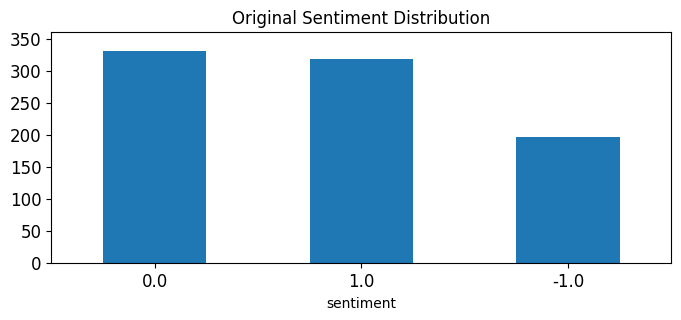

In [12]:
# Original Sentiment Distribution
original_sentiment_counts.plot(kind='bar', 
                               title='Original Sentiment Distribution', 
                               ylim=[0, original_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Sentiment Distribution'}, xlabel='sentiment'>

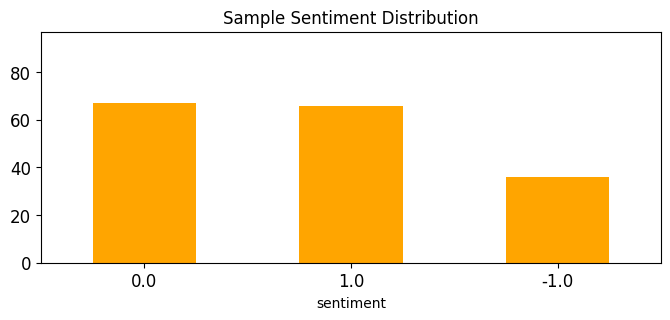

In [13]:
# Sample Sentiment Distribution
sample_sentiment_counts.plot(kind='bar',color='orange', 
                               title='Sample Sentiment Distribution', 
                               ylim=[0, sample_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Original Label Distribution'}, xlabel='label'>

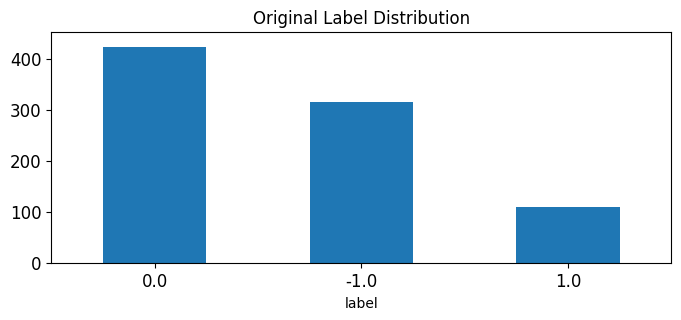

In [14]:
# Original Label Distribution
original_label_counts.plot(kind='bar', 
                               title='Original Label Distribution', 
                               ylim=[0, original_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Label Distribution'}, xlabel='label'>

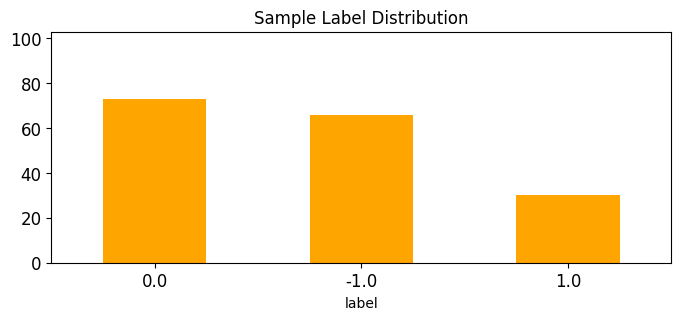

In [15]:
# Sample Label Distribution
sample_label_counts.plot(kind='bar',color='orange', 
                               title='Sample Label Distribution', 
                               ylim=[0, sample_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

### >>> **Exercise 8 :** 

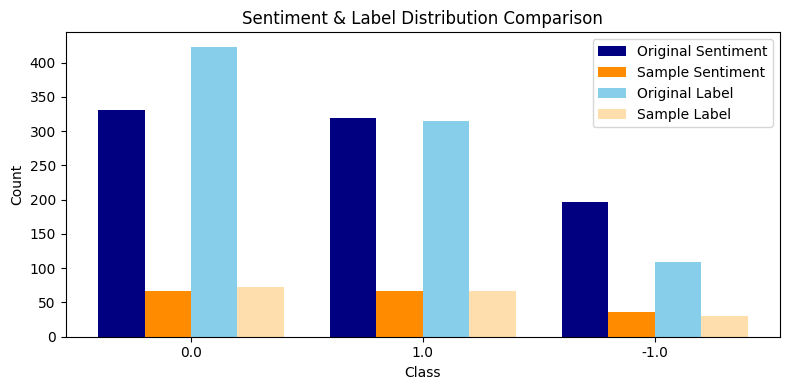

In [16]:
###Exercise 8 :combined bar plot
# Â∞áÂõõÁµÑË≥áÊñôÊîæÂú®Âêå‰∏ÄÂºµÂúñË°®‰∏≠ÊØîËºÉ
# ÂÅáË®≠ÈÄôÂõõÂÄã Series ÈÉΩÊòØ‰ª• -1,0,1 ÁÇ∫ index
x = np.arange(len(original_sentiment_counts.index))  # [-1,0,1] ÁöÑ‰ΩçÁΩÆ
width = 0.2  # ÊØèÂÄã bar ÁöÑÂØ¨Â∫¶

fig, ax = plt.subplots(figsize=(8, 4))

# Áπ™Ë£ΩÂõõÁµÑË≥áÊñôÔºå‰æùÂ∫èÂæÄÂè≥ÂÅèÁßª
ax.bar(x - 1.5*width, original_sentiment_counts.values, width, label='Original Sentiment', color='navy')
ax.bar(x - 0.5*width, sample_sentiment_counts.values, width, label='Sample Sentiment', color='darkorange')
ax.bar(x + 0.5*width, original_label_counts.values, width, label='Original Label', color='skyblue')
ax.bar(x + 1.5*width, sample_label_counts.values, width, label='Sample Label', color='navajowhite')

# Ë®≠ÂÆö x Ëª∏
ax.set_xticks(x)
ax.set_xticklabels(original_sentiment_counts.index)  # -1, 0, 1

# Âä†‰∏äÊ®ôÈ°å„ÄÅÂúñ‰æã
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Sentiment & Label Distribution Comparison")
ax.legend()

plt.tight_layout()
plt.show()


### **>>> Exercise 9 :**

In [17]:
original_dataDf['unigrams'] = original_dataDf['text'].apply(lambda x: dmh.tokenize_text(x))
original_dataDf[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [18]:
count_vect = CountVectorizer()
original_countsVector = count_vect.fit_transform(original_dataDf['text'])
#set new analtzer
analyze = count_vect.build_analyzer()
###Exercise 9 :analyze the first record of original dataframe with the new analyzer
analyze(original_dataDf['text'][0])

['calls', 'on', 'retards']

### **>>> Exercise 10 :**

In [19]:
#check the shape of original_countsVector
original_countsVector.shape

(847, 4346)

In [20]:
###Exercise 10 :provide code that can verify what word 1 represents from the vocabulary(in the fifth record)
row = original_countsVector[4]  # ÂèñÂæóÁ¨¨‰∫îÁ≠ÜË≥áÊñôÁöÑÁ®ÄÁñèÁü©Èô£Ë°®Á§∫
word_indices = row.nonzero()[1]  # ÂèñÂæóÈùûÈõ∂ÂÖÉÁ¥†ÁöÑÁ¥¢Âºï
words = count_vect.get_feature_names_out()[word_indices]  # ÂèñÂæóË©ûÂΩôË°®
# Âç∞Âá∫Á¨¨‰∫îÁ≠ÜË≥áÊñô‰∏≠Âá∫ÁèæÁöÑË©ûÂΩô
print("word indices in the fifth record:", word_indices)
print("words in the fifth record:", words)

word indices in the fifth record: [1846 1169 3349 3844 4333]
words in the fifth record: ['he' 'didn' 'say' 'thank' 'you']


### **>>> Exercise 11 :** 

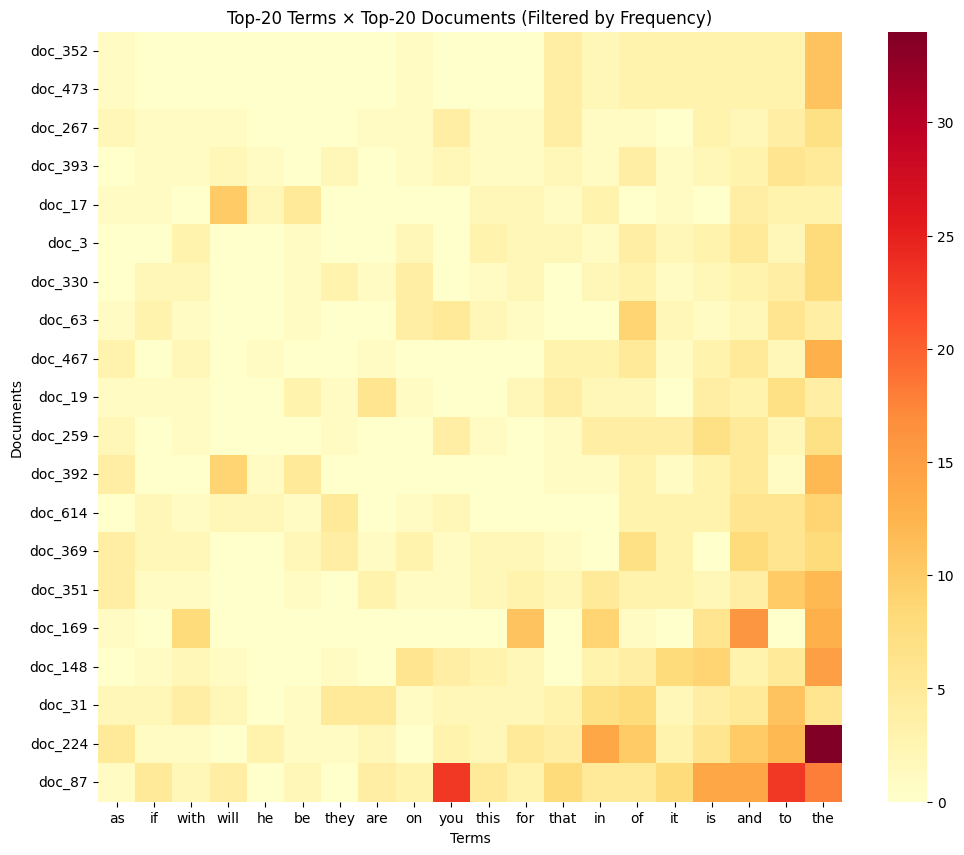

In [21]:
###Exercise 11 :draw heatmap
#ÂÖàÂÅöË©ûÈ†ªÁµ±Ë®àÔºåÂèñÂá∫Âá∫ÁèæÊ¨°Êï∏ÊúÄÈ´òÁöÑÂâç N ÂÄãË©ûÔºåÂÜçÊåëÂá∫ÈÄô‰∫õË©ûË£°ÔºåÂá∫ÁèæÊ¨°Êï∏ÊúÄÂ§öÁöÑÊñáÁ´†ÔºåËÆìÂúñË°®Êõ¥ÈõÜ‰∏≠
# Ë®àÁÆóÊØèÂÄãË©ûÁöÑÁ∏ΩÈ†ªÁéá
# Step 1: ÊâæÂá∫ÊúÄÂ∏∏Ë¶ãÁöÑË©ûÔºà‰æãÂ¶Ç top 20Ôºâ
word_freq = np.array(original_countsVector.sum(axis=0)).flatten()
top_terms_idx = word_freq.argsort()[-20:]
# Step 2: Âú®ÈÄô‰∫õË©û‰∏≠ÔºåÊåëÂá∫ÊúÄÁõ∏ÈóúÁöÑÊñá‰ª∂
# ÂÖàÊääÁü©Èô£ÂàáÂà∞ top_terms
sub_matrix = original_countsVector[:, top_terms_idx]
# Ë®àÁÆóÊñá‰ª∂Á∏ΩÂíåÔºàÂè™ÈáùÂ∞çÈÄô‰∫õË©ûÔºâ
doc_scores = np.array(sub_matrix.sum(axis=1)).flatten()
# ÂèñÂá∫ÊúÄÈ´òÂàÜÁöÑ 20 Êñá‰ª∂
top_docs_idx = doc_scores.argsort()[-20:]
# Step 3: Âª∫Á´ãÂ≠êÁü©Èô£
sample_matrix = original_countsVector[top_docs_idx][:, top_terms_idx]

df_todraw = pd.DataFrame(
    sample_matrix.toarray(),
    columns=[count_vect.get_feature_names_out()[i] for i in top_terms_idx],
    index=["doc_" + str(i) for i in top_docs_idx]
)

# Step 4: Áï´ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_todraw, cmap="YlOrRd", cbar=True, annot=False)
plt.title("Top-20 Terms √ó Top-20 Documents (Filtered by Frequency)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

### >>> **Exercise 12 :**

In [22]:
#bulid term frequency matrix
term_frequencies = []
for j in range(0,original_countsVector.shape[1]):
    term_frequencies.append(sum(original_countsVector[:,j].toarray()))

In [23]:
term_frequencies = np.asarray(original_countsVector.sum(axis=0))[0]

In [24]:
###Exercise 12 :draw a nicer interactive visualization
import plotly.express as px

terms = count_vect.get_feature_names_out()

df = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies
})

df_300 = df[:300]

fig = px.bar(
    df_300,
    x="term",
    y="frequency",
    text="frequency", 
    title="Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 13 :**

In [25]:
###Exercise 13 :efficiently reduce the number of terms want to visualize
df_top = df.sort_values(by="frequency", ascending=False)
#ÂèñÂâç50ÂÄãÈ†ªÁéáÊúÄÈ´òÁöÑË©û
df_top50 = df_top.head(50)

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    text="frequency",   
    title="Top 50 Most Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 14 :**

In [26]:
###Exercise 14:sort the terms on the `x-axis` by frequency instead of in alphabetical order
fig = px.bar(
    df_top.head(300),
    x="term",
    y="frequency",
    text="frequency",
    title="Terms (Sorted by Frequency)",
    labels={"term": "Term", "frequency": "Frequency"}
)

fig.update_traces(textposition="outside", marker_color="orange")
fig.update_layout(xaxis_tickangle=-45, template="plotly_white")
fig.show()

### >>> **Exercise 15 :** 

In [27]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [28]:
###Exercise 15:change the 'term_frequencies' variable for the 'term_frequencies_log'
log_df = pd.DataFrame({
    "term": terms,
    "frequency_log": term_frequencies_log
})

log_df_top = log_df.sort_values(by="frequency_log", ascending=False)
log_df_top300 = log_df_top.head(300)


fig = px.bar(
    log_df_top300,
    x="term",
    y="frequency_log",
    text="frequency_log",   
    title="Terms(Sorted by Log Frequency)",
    labels={"term": "Term", "frequency_log": "Frequency_log"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **new data visualizations** 

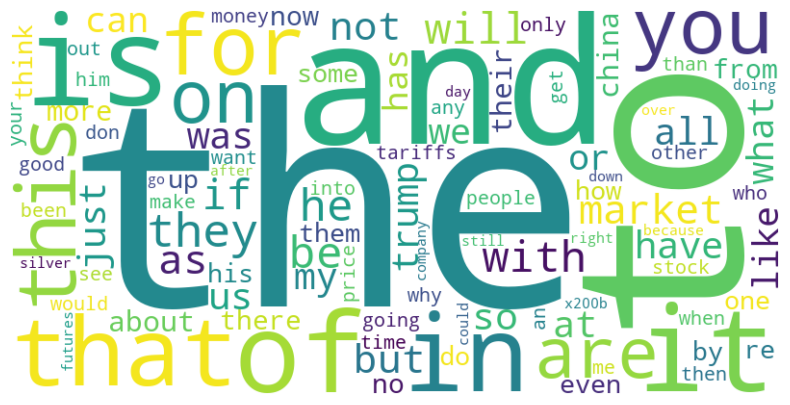

In [29]:
#New 1:Ë©ûÈõ≤
from wordcloud import WordCloud
# Âª∫Á´ãÂ≠óË©ûÈ†ªÁéáÂ≠óÂÖ∏
term_frequencieslist = term_frequencies.tolist()
word_freq_dict = dict(zip(terms, term_frequencieslist))
sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)) #ÊéíÂ∫è
#ÂèñÂâç100Âá∫ÁèæÊúÄÂ§öÊ¨°ÁöÑË©û
terms_keys = sorted_word_freq.keys()
dict_slice100 = {}
for key in list(terms_keys)[:100]:
    dict_slice100[key] = sorted_word_freq[key]
# Áπ™Ë£ΩË©ûÈõ≤
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      colormap="viridis").generate_from_frequencies(dict_slice100)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#‰∏ÄÊ®£‰ΩøÁî®Ë©ûÂá∫ÁèæÁöÑÈ†ªÁéá‰æÜÁï´ÂúñÔºåÂúñ‰∏≠Ë∂äÂ§ßÁöÑË©û‰ª£Ë°®Âá∫ÁèæÈ†ªÁéáË∂äÈ´ò
#Ë∑üÂâçÈù¢ÁöÑÈï∑Ê¢ùÂúñË°®ÈÅîÁöÑÊÑèÁæ©Áõ∏ÂêåÔºåÈÉΩÊòØ"the"„ÄÅ"to"„ÄÅ"and"ÊòØÂâç‰∏âÈ´òÂá∫ÁèæÁöÑË©û

C:\Users\user\AppData\Local\Temp\ipykernel_9340\2634672769.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



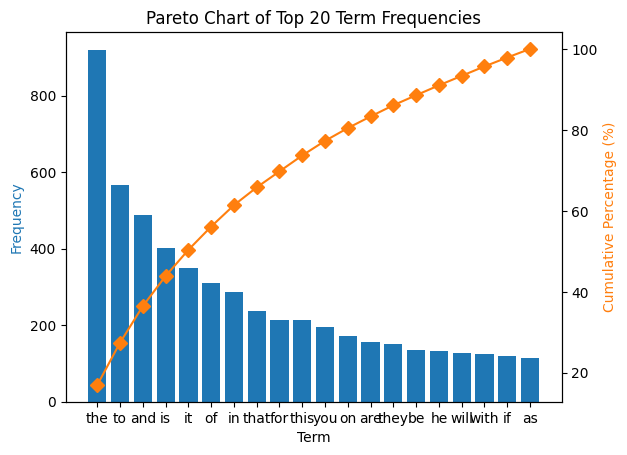

In [30]:
#New 2:Pareto Chart:ÁµêÂêàÈï∑Ê¢ùÂúñÂíåÁ¥ØÁ©çÊäòÁ∑öÂúñ
#ÂèñÂâç20È†ªÁéáÊúÄÈ´òÁöÑÂ≠óË©û
df_20 = df_top.head(20)
#Ë®àÁÆóÁ¥ØÁ©çÁôæÂàÜÊØî
df_20["cum_percent"] = df_20["frequency"].cumsum()/df_20["frequency"].sum()*100

#Áπ™Âúñ
fig, ax1 = plt.subplots()

# Èï∑Ê¢ùÂúñ
ax1.bar(df_20["term"], df_20["frequency"], color='C0')
ax1.set_xlabel('Term')
ax1.set_ylabel('Frequency', color='C0')

# ÊäòÁ∑öÂúñ
ax2 = ax1.twinx()
ax2.plot(df_20["term"], df_20["cum_percent"], color='C1', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage (%)', color='C1')

plt.title('Pareto Chart of Top 20 Term Frequencies')
plt.show()

#Áî±Pareto Chart‰∏≠ÂèØ‰ª•ÁúãÂá∫ÔºåÈï∑Ê¢ùÂúñÂæàÂÄºËßÄÁöÑÈ°ØÁ§∫Âì™‰∫õË©ûÂá∫ÁèæÁöÑÈ†ªÁéáÊúÄÈ´òÔºåËÄåÁ¥ØÁ©çÊäòÁ∑öÂúñÂâáÂèØ‰ª•ÁúãÂá∫ÈÄô‰∫õÈ´òÈ†ªË©û‰ΩîÊï¥È´îË©ûÂΩôÁöÑÊØî‰æã
#Ê†πÊìöÊâÄÊúâË©ûÂΩôÁöÑÁ¥ØÁ©çÁôæÂàÜÊØîÔºåÂèØ‰ª•ÁôºÁèæÂâç8ÂÄãÈ´òÈ†ªË©ûÂ§ßÁ¥Ñ‰Ωî‰∫ÜÁ∏ΩË©ûÂΩôÊï∏ÁöÑ60%Â∑¶Âè≥ÔºåÈÄôÁ¨¶ÂêàÂ∏ïÁ¥ØÊâòÂéüÁêÜ(80/20Ê≥ïÂâá)‰∏≠Â∞ëÊï∏ÈáçË¶ÅÂõ†Á¥†‰ΩîÂ§öÊï∏ÁµêÊûúÁöÑÊ¶ÇÂøµ

In [31]:
#New 3:Tree map:Áî®Áü©ÂΩ¢ÂçÄÂ°äÂ§ßÂ∞èË°®Á§∫Ë©ûÈ†ª
import plotly.express as px
#ÂèñÂâç50È†ªÁéáÊúÄÈ´òÁöÑÂ≠óË©û
df_top50 = df_top.head(50)
fig = px.treemap(
    df_top50,
    path=['term'],  # ‰ΩøÁî® 'term' ‰ΩúÁÇ∫Â±§Á¥ö
    values='frequency',  # ‰ΩøÁî® 'frequency' ‰ΩúÁÇ∫ÂçÄÂ°äÂ§ßÂ∞è
    title='Tree Map of Top 50 Terms by Frequency'
)
fig.show()
#Áî±Tree mapÂèØ‰ª•ÂæàÁõ¥ËßÄÁöÑÁúãÂá∫Âì™‰∫õË©ûÂá∫ÁèæÁöÑÈ†ªÁéáËºÉÈ´òÔºåÂõ†ÁÇ∫ÈÄô‰∫õË©ûÊúÉ‰ΩîÊìöËºÉÂ§ßÁöÑÂçÄÂ°äÈù¢Á©ç
#ÂÉèÊòØ"the"„ÄÅ"of"„ÄÅ"and"ÈÄô‰∫õË©ûÁöÑÂçÄÂ°äÈù¢Á©çÂ∞±ÊòéÈ°ØÂ§ßÊñºÂÖ∂‰ªñË©ûÔºåË°®Á§∫ÂÆÉÂÄëÂá∫ÁèæÁöÑÈ†ªÁéáËºÉÈ´ò


In [32]:
#New 4:Bubble Chart:Â≠óË©ûÁî®Ê∞£Ê≥°Â§ßÂ∞èË°®Á§∫È†ªÁéáÔºåÂèØ‰ª•Âä†‰∏äÂÖ∂‰ªñÁ∂≠Â∫¶Ôºà‰æãÂ¶ÇÔºöË©ûÈï∑„ÄÅTF-IDF ÂÄºÔºâ
#ÂèñÂâç50È†ªÁéáÊúÄÈ´òÁöÑÂ≠óË©û
df_20["term_length"] = df_20["term"].apply(len)
fig = px.scatter(
    df_20,
    x="term",
    y="frequency",
    size="frequency",  # Ê∞£Ê≥°Â§ßÂ∞èÊ†πÊìöÈ†ªÁéá
    color="term_length",  # Ê∞£Ê≥°È°èËâ≤Ê†πÊìöË©ûÈï∑
    hover_name="term",  # ÊªëÈº†Êá∏ÂÅúÈ°ØÁ§∫Ë©û
    title="Bubble Chart of Top 20 Terms",
    labels={"term": "Term", "frequency": "Frequency", "term_length": "Term Length"},
    size_max=60  # ÊúÄÂ§ßÊ∞£Ê≥°Â§ßÂ∞è
)
fig.show()
#Áî±Bubble ChartÂèØ‰ª•ÁúãÂá∫Âì™‰∫õË©ûÂá∫ÁèæÁöÑÈ†ªÁéáËºÉÈ´òÔºåÂõ†ÁÇ∫ÈÄô‰∫õË©ûÊúÉ‰ª•ËºÉÂ§ßÁöÑÊ∞£Ê≥°È°ØÁ§∫
#ÂêåÊôÇ‰πüÂèØ‰ª•Ê†πÊìöÈ°èËâ≤ÁúãÂà∞Ë©ûÈï∑ÁöÑÂàÜÂ∏ÉÊÉÖÊ≥Å


C:\Users\user\AppData\Local\Temp\ipykernel_9340\1893442800.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Phase 2
Phase2ÁöÑÁ∑¥ÁøíÁöÜ‰ª•labelÊ¨Ñ‰ΩçÁÇ∫‰∏ª

### >>> **Exercise 16 :**


In [33]:
###Exercise 16:Review the words that were filtered in each category and comment about the differences and similarities that you can see.
#‰ª•labelÊ¨Ñ‰ΩçÁÇ∫‰∏ª

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# mine patterns that can be representative to each category
categories = original_dataDf['label'].unique()
category_dfs = {}
for category in categories:
    category_dfs[category] = original_dataDf[original_dataDf['label'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [34]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


For category -1.0 we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14          1
14

### ÁôºÁèæ
1. ÊúÄÂ∏∏Ë¶ãÂ§öÂçäÊòØ‰∏Ä‰∫õÂÅúÁî®Ë©ûÔºå‰æãÂ¶Ç ‚Äúthe‚Äù„ÄÅ ‚Äúto‚Äù„ÄÅ ‚Äúand‚ÄùÁ≠âÔºåÈÄô‰∫õË©ûÂá∫ÁèæÂú®ÂêÑÁ®ÆÈ°ûÂà•‰∏≠ÈÉΩÂæàÈ†ªÁπÅÔºå‰ΩÜÂ∞ç‰∏ªÈ°åÂà§Âà•Ê≤íÊúâË≤¢Áçª„ÄÇ
2. ‰ΩéÈ†ªË©ûÔºàBottom 1%ÔºâË¢´ÈÅéÊøæÊéâÁöÑ‰ΩéÈ†ªË©ûÂ§ßÂ§öÊòØÂè™Âá∫Áèæ‰∏ÄÊ¨°ÊàñÊ•µÂ∞ëÊ¨°ÁöÑÂñÆÂ≠óË∑üÊï∏Â≠ó„ÄÇ

### >>> **Exercise 17 :**

In [35]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Tranfer category name to a safe format for file naming
    category_str = str(category)
    category_safe = category_str.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [36]:
# mining those patterns
# setting minSup at 9

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_0_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_0= obj1.getPatternsAsDataFrame()
obj2 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_1= obj2.getPatternsAsDataFrame()
obj3 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_2= obj3.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [37]:
# integrate all mined patterns
dfs = [frequentPatternsDF_0, frequentPatternsDF_1, frequentPatternsDF_2]
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [38]:
# integrate these now category-specific patterns into data
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(original_dataDf['text'])
terms = count_vect.get_feature_names_out()  

original_dataDf['tokenized_text'] = original_dataDf['text'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=original_dataDf.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = original_dataDf['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=original_dataDf.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  01378  02  027  03  06  ...  still  weekly  ll  am  few  end  right
0     0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
1     0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
2     0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
3     0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
4     0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
..   ..  ...    ...  ..  ...  ..  ..  ...    ...     ...  ..  ..  ...  ...    ...
842   0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
843   0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
844   0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
845   0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0
846   0    0      0   0    0   0   0  ...      0       0   0   0    0    0      0

[847 rows x 4384 columns]

In [39]:
###Exercise 17:Implement the FAE Top-K and MaxFPGrowth algorithms 
#For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. 
#For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9
#Only implement '0' label category as an example

# FAE Top-K Êé°Áî®ÊñπÂºè 
from PAMI.frequentPattern.topk import FAE as topk_FAE
import time

iFile = 'td_freq_db_0_0.csv'  # ‰∫§ÊòìÊ™î

fae_results = {}  # ÂÑ≤Â≠òÊØèÊ¨°ÁöÑ dataframe Ëàá runtime

for k in [500, 1000, 1500]:
    print(f"\n=== FAE Top-K: k = {k} ===")
    # Âª∫Á´ãFAE Âª∫ÊßãÂ≠êÂèÉÊï∏‰ª•Êñá‰ª∂ÁÇ∫‰∏ªÁâ©‰ª∂
    obj = topk_FAE.FAE(iFile=iFile, k=k)
    
    # ÊåñÁµï‰∏¶Ê∏¨ÈáèÊôÇÈñì
    start = time.time()
    obj.mine()
    end = time.time()
    runtime = end - start
    
    
    try:
        patterns_df = obj.getPatternsAsDataFrame()
    except Exception as e:
        # Ëã•Ê≤íÊúâ DataFrame ‰ªãÈù¢ÔºåËÆÄÂá∫ obj.finalPatterns Êàñ obj.finalPatternSet
        print("ÁÑ°Ê≥ïÁî® getPatternsAsDataFrame() ÂèñÂæó DataFrameÔºåÂòóË©¶ÂæûÁâ©‰ª∂Â±¨ÊÄßËÆÄÂèñ...")
        if hasattr(obj, 'finalPatterns'):
            fp = obj.finalPatterns
            patterns_df = pd.DataFrame([(p, s) for p, s in fp.items()], columns=['Patterns','Support'])
        else:
            raise e
    
    
    print(f"ÊâæÂà∞Ê®°ÂºèÊï∏: {len(patterns_df)}; runtime(s): {runtime:.3f}")
    # ÂÑ≤Â≠òÊ™îÊ°àÔºà‰æõÂæåÁ∫åÊØîÂ∞çÔºâ
    outname = f'freq_patterns_comp_graphics_FAE_k{k}.txt'
    try:
        obj.save(outname)
    except Exception:
        # Ëã•Ê≤íÊúâÂÖßÂª∫ saveÔºåÂ∞±‰ª• dataframe ÂÑ≤Â≠ò
        patterns_df.to_csv(outname, index=False, sep='\t', encoding='utf-8')
    print(f"patterns saved -> {outname}")
    
    fae_results[k] = {'df': patterns_df, 'runtime': runtime}


=== FAE Top-K: k = 500 ===


KeyboardInterrupt: 

In [ ]:
# MaxFPGrowth Âü∑Ë°å
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

maxf_results = {}

for minSup in [3, 6, 9]:
    print(f"\n=== MaxFPGrowth: minSup = {minSup} ===")
    obj = maxfp.MaxFPGrowth(iFile=iFile, minSup=minSup)
    
    start = time.time()
    obj.mine()
    end = time.time()
    runtime = end - start
    
    try:
        patterns_df = obj.getPatternsAsDataFrame()
    except Exception:
        print("ÁÑ°Ê≥ïÁî® getPatternsAsDataFrame() ÂèñÂæó DataFrameÔºåÂòóË©¶ÂæûÁâ©‰ª∂Â±¨ÊÄßËÆÄÂèñ...")
        if hasattr(obj, 'finalPatterns'):
            fp = obj.finalPatterns
            patterns_df = pd.DataFrame([(p, s) for p, s in fp.items()], columns=['Patterns','Support'])
        else:
            raise
    
    print(f"ÊâæÂà∞Ê®°ÂºèÊï∏: {len(patterns_df)}; runtime(s): {runtime:.3f}")
    outname = f'freq_patterns_comp_graphics_MaxFPGrowth_minSup{minSup}.txt'
    try:
        obj.save(outname)
    except Exception:
        patterns_df.to_csv(outname, index=False, sep='\t', encoding='utf-8')
    print(f"patterns saved -> {outname}")
    
    maxf_results[minSup] = {'df': patterns_df, 'runtime': runtime}

In [ ]:
# ÊØîÂ∞çÂ∑•ÂÖ∑ÂáΩÂºè
def pattern_set_from_df(df):
    # ÂÅáË®≠Ê¨Ñ‰ΩçÂè´ 'Patterns'Ôºõpattern Â≠ó‰∏≤ÂåñÂΩ¢ÂºèË¶Å‰∏ÄËá¥ÔºàÁ©∫ÁôΩÂàÜÈöîÔºâ
    return set(df['Patterns'].astype(str).tolist())

# FPGrowth ‰πãÂâçÁöÑÁµêÊûú
fp_df = frequentPatternsDF_0
fp_set = pattern_set_from_df(fp_df)

# ÊØîÂ∞ç FAE ÂêÑ k Ëàá MaxFPGrowth ÂêÑ minSup
def compare_sets(base_set, other_set):
    inter = base_set.intersection(other_set)
    uni = base_set.union(other_set)
    jaccard = len(inter) / len(uni) if len(uni) > 0 else 0.0
    return {'base_count': len(base_set), 'other_count': len(other_set),
            'intersection': len(inter), 'jaccard': jaccard}

print("=== Summary comparison with FPGrowth ===")
for k, info in fae_results.items():
    s = compare_sets(fp_set, pattern_set_from_df(info['df']))
    print(f"FAE k={k} | patterns={s['other_count']} | intersect={s['intersection']} | jaccard={s['jaccard']:.3f} | runtime(s)={info['runtime']:.3f}")

for minsup, info in maxf_results.items():
    s = compare_sets(fp_set, pattern_set_from_df(info['df']))
    print(f"MaxFPGrowth minsup={minsup} | patterns={s['other_count']} | intersect={s['intersection']} | jaccard={s['jaccard']:.3f} | runtime(s)={info['runtime']:.3f}")

# Â¶ÇÊûúË¶ÅÂàóÂá∫ÂÖ±ÂêåÊàñÂ∑ÆÁï∞ÁöÑ patternÔºà‰æãÂ¶ÇÂâç 20Ôºâ
for k, info in fae_results.items():
    other_set = pattern_set_from_df(info['df'])
    common = sorted(list(fp_set & other_set))[:20]
    only_in_fae = sorted(list(other_set - fp_set))[:20]
    print(f"\nFAE k={k} ‚Äî ÂÖ± {len(common)} ÂÄãËàá FPGrowth ÈáçÁñäÔºàÂÖàÂàóÂâç 20ÔºâÔºö")
    print(common)
    print(f"FAE k={k} ‚Äî ÂÉÖÂá∫ÁèæÂú® FAE ÁöÑÂâç 20Ôºö")
    print(only_in_fae)

for minsup, info in maxf_results.items():
    other_set = pattern_set_from_df(info['df'])
    common = sorted(list(fp_set & other_set))[:20]
    only_in_maxf = sorted(list(other_set - fp_set))[:20]
    print(f"\nMaxFPGrowth minsup={minsup} ‚Äî ÂÖ± {len(common)} ÂÄãËàá FPGrowth ÈáçÁñäÔºàÂÖàÂàóÂâç 20ÔºâÔºö")
    print(common)
    print(f"MaxFPGrowth minsup={minsup} ‚Äî ÂÉÖÂá∫ÁèæÂú® MaxFPGrowth ÁöÑÂâç 20Ôºö")
    print(only_in_maxf)

### >>> **Exercise 18 :**

c:\Users\user\114-1MLHW\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



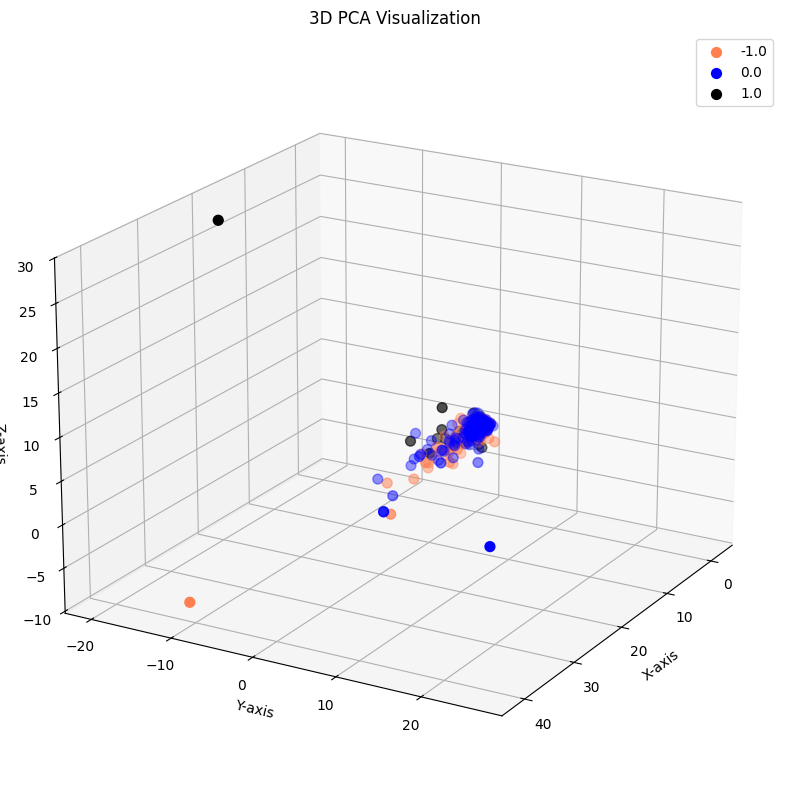

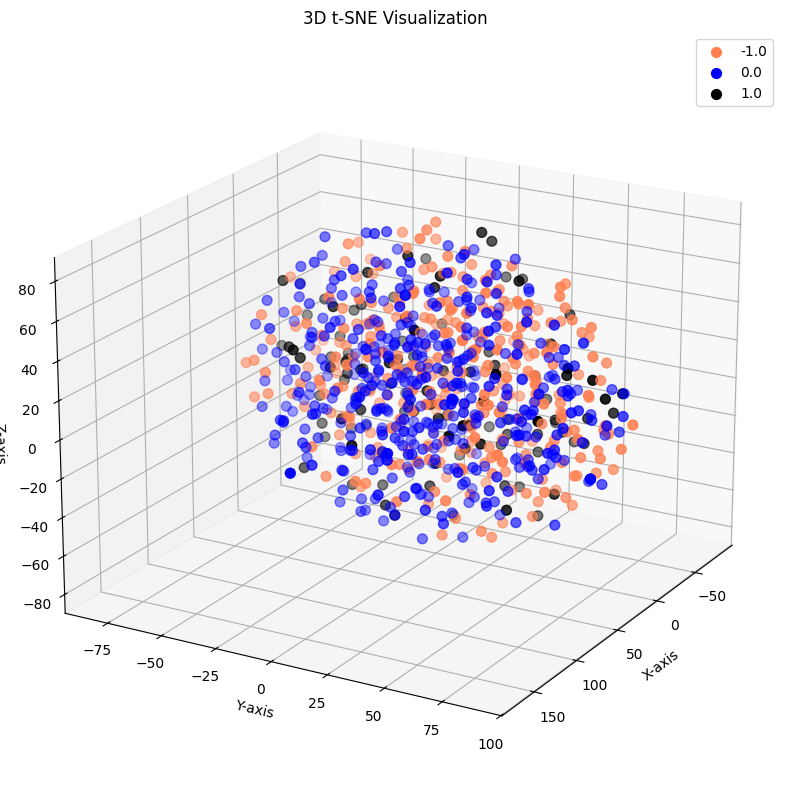

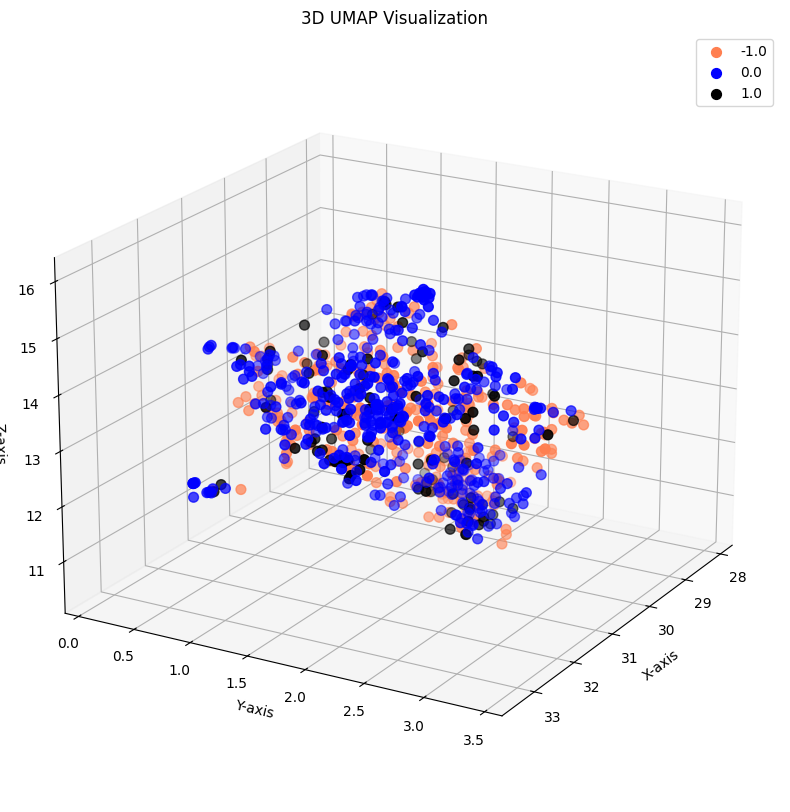

In [ ]:
###Exercise18:reduce the dimension to 3, and plot the result use 3-D plot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ÈôçÁ∂≠Âà∞ 3 Á∂≠
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = original_dataDf['label'].unique() 

# ÂÆöÁæ©Áπ™ÂúñÂáΩÂºè
def plot_3d_scatter(X_reduced, title):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[original_dataDf['label'] == category][:, 0]
        ys = X_reduced[original_dataDf['label'] == category][:, 1]
        zs = X_reduced[original_dataDf['label'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, s=50)
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # ‰∏âÂÄã‰∏çÂêåË¶ñËßí
    for elev, azim in [(20, 30), (60, 120), (30, 240)]:
        ax.view_init(elev=elev, azim=azim)
        plt.show()

# ÂêÑÈôçÁ∂≠ÊñπÊ≥ïÂàÜÂà•Áπ™Ë£Ω
plot_3d_scatter(X_pca_3d, "3D PCA Visualization")
plot_3d_scatter(X_tsne_3d, "3D t-SNE Visualization")
plot_3d_scatter(X_umap_3d, "3D UMAP Visualization")

### ÁôºÁèæ
1. PCAÁöÑÁµêÊûú‰∏≠ÈªûÁöÑÂàÜ‰ΩàÊòéÈ°ØÈáçÁñäÔºåÊ≤íÊúâÊòéÁ¢∫ÈÇäÁïåÔºåÈ°ØÁ§∫PCAÈõ£‰ª•Ê∏ÖÊ•öÂçÄÂàÜÊñáÊú¨‰∏ªÈ°åÔºåÊúâ‰∏âÂÄãË≥áÊñôÈªûËàá‰∏ªË¶ÅÁæ§ÈõÜË∑ùÈõ¢ÂæàÈÅ†ÔºåÊé®Ê∏¨ÁÇ∫outlier
2. t-SNEÁöÑÁµêÊûú‰∏≠ÔºåÈªûÈõ≤ÂëàÁèæÁêÉÁãÄÂàÜÂ∏ÉÔºå‰∏çÂêåÈ°ûÂà•ÁöÑÈªû‰∫íÁõ∏Ê∑∑ÂíåÔºåÈÇäÁïåÊ®°Á≥äÔºåÊú™ÂΩ¢ÊàêÊ∏ÖÊô∞Áæ§ÈõÜ
3. UMAPÁöÑÁµêÊûú‰∏≠Ë≥áÊñôÈªû‰πüÊòØÂëàÁèæÁêÉÁãÄÂàÜÂ∏ÉÔºåÊú™ÂΩ¢ÊàêÊ∏ÖÊô∞ÁöÑÁæ§ÈõÜ
4. ÈôçÁ∂≠Ëá≥ 3 Á∂≠ÂæåÔºåË≥áÊñô‰∏ªÈ°åÁöÑÂàÜÁæ§ÊÄß‰ªç‰∏çÂº∑

### >>> **Exercise 20 :**

In [ ]:
###Exercise 20:observe from the Cosine Similarity results of different text references
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = original_dataDf.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = original_dataDf.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = original_dataDf.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:43: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_18928\3048054539.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

### ÁôºÁèæ
ËàáËá™Ë∫´Áõ∏ÊØîÊôÇÔºåÈ§òÂº¶Áõ∏‰ººÂ∫¶ÁÇ∫ 1ÔºåË°®Á§∫ÂÆåÂÖ®Áõ∏‰ºº„ÄÇÊ†πÊìöÈ§òÂº¶Áõ∏‰ººÂ∫¶ÁµêÊûúÔºåText 1„ÄÅText 2„ÄÅText 3 ÁöÑË™ûÂΩôÊàñ‰∏ªÈ°å‰∫í‰∏çÊé•ËøëÔºå‰∏ªÈ°åÁÑ¶ÈªûÁõ∏Áï∂‰∏çÂêå„ÄÇ

### >>> **Exercise 21 :**

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = {-1: "negative", 0: "neutral", 1: "positive"}
target_names = [category_mapping[i] for i in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



In [ ]:
###Exercise 21:Use the augmented data to perform classification using Naive Bayes 
# Model with augmented data (TDM + pattern matrix)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = {-1: "negative", 0: "neutral", 1: "positive"}
target_names = [category_mapping[i] for i in sorted(category_mapping.keys())]

# ÂàÜÂâ≤Ë≥áÊñôÈõÜ(70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, original_dataDf['label'], test_size=0.3, random_state=42
)

# Ë®ìÁ∑¥
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# È†êÊ∏¨
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Ë©ï‰º∞
print("Accuracy with augmented data:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (augmented data):\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))


Accuracy with augmented data: 0.596078431372549

Classification Report (augmented data):
               precision    recall  f1-score   support

    negative     0.5950    0.7347    0.6575        98
     neutral     0.6371    0.6529    0.6449       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4486       255
weighted avg     0.5451    0.5961    0.5648       255



### >>> **Exercise 22 :**

### ÁôºÁèæ
1. Êï¥È´îÊ∫ñÁ¢∫ÁéáËàáÂπ≥Âùá F1 ÂàÜÊï∏ÁöÜÊúâËºïÂæÆÊèêÂçáÔºàÁ¥Ñ 0.3‚Äì0.4%ÔºâÔºåË™™Êòépattern augmentation Â∞çÊ®°ÂûãÊúâÊ≠£Âêë‰ΩÜÊúâÈôêÁöÑÂπ´Âä©„ÄÇ
2. negative È°ûÂà•Âú® precision Ëàá F1 ‰∏äÈÉΩÊúâ‰∫õÂæÆÈÄ≤Ê≠•ÔºåË°®Á§∫Ê®°ÂûãÊõ¥ËÉΩÂàÜËæ®Ë≤†Èù¢Ê®£Êú¨„ÄÇ
3. neutral È°ûÂà•ÁöÑËÆäÂåñÂæàÂ∞èÔºå‰ΩÜ recall Áï•ÊúâÊèêÂçáÔºå‰ª£Ë°®‰∏≠ÊÄßÈ°ûÂà•ÁöÑË¶ÜËìãÁéáÁ®çÂ•Ω„ÄÇ
4. positive È°ûÂà•Âπæ‰πéÊ≤íÊúâÊîπÂñÑÔºå‰ªçÁÑ∂ÊòØÊ®°ÂûãÊúÄÂº±ÁöÑ‰∏ÄÈ°û„ÄÇ
5. patternÂº∑Âåñ‰∫Ü negative Ëàá neutral È°ûÂà•Â∏∏Ë¶ãË™ûÊÑèÁâπÂæµ„ÄÇ

### >>> **Exercise 23 :**

In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4878    0.4082    0.4444        98
     neutral     0.5294    0.6694    0.5912       121
    positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



### ÁôºÁèæ
| ÂéüÂõ†Èù¢Âêë  | ÁÇ∫‰ªÄÈ∫º Decision Tree ËºÉÂ∑Æ | Â∞çÊØî Naive Bayes ÁöÑÂÑ™Âã¢    |
| ----- | -------------------- | --------------------- |
| ÁâπÂæµÁ∂≠Â∫¶  | È´òÁ∂≠Á®ÄÁñèÁâπÂæµËÆìÊ®πÁãÄÂàáÂâ≤Â§±Êïà        | Naive Bayes ÂèØÁõ¥Êé•ËôïÁêÜÁ®ÄÁñèË©ûÈ†ª |
| Ë≥áÊñôÈáè   | Ê®πÊ®°ÂûãÈúÄË¶ÅÂ§ßÈáèÊ®£Êú¨ÈÅøÂÖçÈÅéÊì¨Âêà       | Naive Bayes Âú®Â∞èÊ®£Êú¨‰∏ã‰ªçÁ©©ÂÆö  |
| ÁâπÂæµÈóúËÅØ  | ÈúÄÊâæÂà∞ÊúâÊïàÂàÜÂâ≤Èªû‰ΩÜÈõ£‰ª•ÂÅöÂà∞        | ÂÅáË®≠Ë©ûÁç®Á´ãÔºåË®àÁÆóÁ∞°ÂñÆ‰∏îÁ©©ÂÆö         |
| Ë≥áÊñô‰∏çÂπ≥Ë°° | ÊòìÂÅèÂêëÂ§öÊï∏È°ûÂà•ÔºàneutralÔºâ     | ‰ª•Ê¢ù‰ª∂Ê©üÁéáÂª∫Ê®°Ôºå‰∏çÊòìÂö¥ÈáçÂÅèÊñú        |

Decision Tree Âú®ÊñáÂ≠óÂûã TDM Ë≥áÊñô‰∏äÁöÑË°®Áèæ‰ΩéÊñº Naive BayesÔºå‰∏ªË¶ÅÂéüÂõ†ÊòØÊ±∫Á≠ñÊ®π‰∏çÊìÖÈï∑ËôïÁêÜÈ´òÁ∂≠‰∏îÁ®ÄÁñèÁöÑÁâπÂæµÁ©∫ÈñìÔºåÂÆπÊòìÂú®Â∞ëÈáèÊ®£Êú¨‰∏äoverfitting„ÄÇÊ≠§Â§ñÔºåÊñáÂ≠óË≥áÊñô‰∏≠ÂêÑË©ûÁöÑÂá∫ÁèæÂàÜ‰ΩàÊ•µ‰∏çÂùáÂãªÔºå‰ΩøÂæóÊ±∫Á≠ñÊ®πÈõ£‰ª•ÊâæÂà∞ÂÖ∑‰ª£Ë°®ÊÄßÁöÑÂàÜÂâ≤ÁâπÂæµ„ÄÇÁõ∏ËºÉ‰πã‰∏ãÔºåNaive Bayes Âü∫ÊñºÊ¢ù‰ª∂Ê©üÁéáÁöÑÁµ±Ë®àÁâπÊÄßÔºåËÉΩÊõ¥ÊúâÊïàÂú∞Âà©Áî®Ë©ûÈ†ªË≥áË®äÔºå‰∏¶Âú®È°ûÂà•‰∏çÂπ≥Ë°°ÁöÑÊÉÖÊ≥Å‰∏ãÁ∂≠ÊåÅËºÉ‰Ω≥ÁöÑÊï¥È´îË°®Áèæ„ÄÇ

### >>> **Exercise 24 :**

In [ ]:
###Exercise 24:Implement using the augmented data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, original_dataDf['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (augmented data):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented data): 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    negative     0.5200    0.3980    0.4509        98
     neutral     0.5120    0.7025    0.5923       121
    positive     0.2857    0.1111    0.1600        36

    accuracy                         0.5020       255
   macro avg     0.4393    0.4038    0.4011       255
weighted avg     0.4832    0.5020    0.4769       255



### ÁôºÁèæ
(1) Decision Tree Âú® augmented data ‰∏äÁï•ÊúâÊèêÂçá

    Ê∫ñÁ¢∫ÁéáÁî± 0.490 ‚Üí 0.502ÔºåÊèêÂçáÁ¥Ñ 1.2%„ÄÇ

    Macro F1 Áî± 0.3928 ‚Üí 0.4011Ôºå‰πüÊúâÂ∞èÂπÖÂ¢ûÂä†„ÄÇ

    Ë™™Êòé pattern augmentation Â∏∂‰æÜÁöÑÁâπÂæµÂú®ÊüêÁ®ÆÁ®ãÂ∫¶‰∏äÂ¢ûÂº∑‰∫ÜÊ®°ÂûãÁöÑÂçÄÂàÜÈ°ûÂà•ËÉΩÂäõ„ÄÇ

    üîπ ÂéüÂõ†Ôºö

        Âä†ÂÖ• pattern ÁâπÂæµÂæåÔºåÊ®°ÂûãÂ§ö‰∫ÜÈ°çÂ§ñÁöÑË©ûÁµÑÊàñÈóúÈçµË©ûÁ∑öÁ¥¢Ôºå‰ΩøÂæóÈÉ®ÂàÜÈ°ûÂà•ÔºàÂ∞§ÂÖ∂ÊòØ neutral È°ûÔºâÊõ¥ÂÆπÊòìË¢´ÂàÜËæ®„ÄÇ

        ÈÄô‰∫õ pattern ÊúâÂä©ÊñºÊ∏õÂ∞ëÁâπÂæµÁ®ÄÁñèÊÄßÔºåËÆì Decision Tree ËÉΩÊâæÂà∞Á®çÂæÆÊõ¥ÊúâÊÑèÁæ©ÁöÑÂàÜÂâ≤Èªû„ÄÇ

(2) ‰ΩÜË°®Áèæ‰ªçÊòéÈ°Ø‰ΩéÊñº Naive Bayes

    Âç≥‰ΩøÂä†‰∏ä patternÔºåDecision Tree ÁöÑÊ∫ñÁ¢∫Áéá‰ªçÂè™Êúâ 0.50 Â∑¶Âè≥ÔºåËÄå Naive Bayes Á¥ÑÁÇ∫ 0.59‚Äì0.60„ÄÇ

    Naive Bayes ÁöÑ F1-score ËàáÊï¥È´îÁ©©ÂÆöÂ∫¶ÈÉΩÊõ¥È´òÔºåÁâπÂà•ÊòØÂú® negative Ëàá neutral È°ûÂà•„ÄÇ

    üîπ ÂéüÂõ†Ôºö

        Decision Tree ‰∏çÈÅ©ÂêàÈ´òÁ∂≠Á®ÄÁñèÁöÑÊñáÂ≠óÁâπÂæµÔºö
        Âç≥‰ΩøÂä†ÂÖ• patternÔºåTDM Êú¨Ë≥™‰ªçÊòØÈùûÂ∏∏Á®ÄÁñèÁöÑÁü©Èô£ÔºåDecision Tree ‰ªçÈõ£‰ª•ÊúâÊïàÂ≠∏Áøí„ÄÇ

        ÁâπÂæµÂàáÂâ≤ÊñπÂºèÈôêÂà∂‰∫ÜË™ûÊÑèË°®ÈÅîÔºö
        Decision Tree Âè™ËÉΩ‰æùÈù†ÂñÆ‰∏ÄÁâπÂæµÈñæÂÄºÂàáÂâ≤ÔºåÁÑ°Ê≥ïÂêåÊôÇËÄÉÊÖÆÂ§öÂÄãË©û‰πãÈñìÁöÑËÅØÂêàË™ûÊÑèÔºõ
        Áõ∏ÊØî‰πã‰∏ãÔºåNaive Bayes ÁöÑÊ©üÁéáÊ®°ÂûãÊõ¥ËÉΩÊï¥ÂêàÊï¥È´îË©ûÈ†ªÂàÜ‰Ωà„ÄÇ

        Ë≥áÊñô‰∏çÂπ≥Ë°°ËàáÈÅéÊì¨ÂêàÂïèÈ°å‰ªçÂ≠òÂú®Ôºö
        positive È°ûÂà•Ê®£Êú¨Â∞ëÔºàrecall Âè™Êúâ 0.1111ÔºâÔºåÂ∞éËá¥Ê®πÊ®°Âûã‰ªçÂÇæÂêëÈ†êÊ∏¨Â§öÊï∏È°ûÂà•ÔºàneutralÔºâ„ÄÇ

### >>> **Exercise 25 :**

Âú®ÊàëÁúã‰æÜÔºåÈÅ∏ÊìáÊúÄÈÅ©ÂêàÁâπÂÆö‰ªªÂãôÁöÑÊ®°ÂûãÔºåÈúÄË¶ÅÁ∂úÂêàËÄÉÊÖÆË≥áÊñôÁâπÊÄß„ÄÅÊ®°ÂûãÂÅáË®≠ËàáÂØ¶È©óÁµêÊûúÔºåËÄå‰∏çÊòØÂñÆÁ¥î‰æùÈù†Ê∫ñÁ¢∫Áéá„ÄÇ

1.  Ê†πÊìöË≥áÊñôÁâπÊÄßÈÅ∏ÊìáÊ®°Âûã

    Ë≥áÊñôÂûãÊÖã

        ÊñáÂ≠óË≥áÊñôÈÄöÂ∏∏È´òÁ∂≠‰∏îÁ®ÄÁñèÔºà‰æãÂ¶Ç TDM„ÄÅTF-IDFÔºâÔºåÈÅ©Âêà Naive Bayes ÈÄôÈ°ûÁµ±Ë®àÂûãÊ®°Âûã„ÄÇ

        Â¶ÇÊûúË≥áÊñôÊòØÈÄ£Á∫åÊï∏ÂÄºÁâπÂæµÊàñÊ∑∑ÂêàÂûãÁâπÂæµÔºåÂâáÂèØ‰ª•ËÄÉÊÖÆ Decision Tree„ÄÅSVM„ÄÅLogistic Regression Á≠â„ÄÇ

      Ë≥áÊñôË¶èÊ®°

        Â∞èÊ®£Êú¨Êï∏ÈáèÔºöNaive Bayes ÊàñÁ∑öÊÄßÊ®°ÂûãÈÄöÂ∏∏Ë°®ÁèæËºÉÁ©©ÂÆö„ÄÇ

        Â§ßÊ®£Êú¨Êï∏ÈáèÔºöËºÉË§áÈõúÊ®°ÂûãÔºàDecision Tree„ÄÅRandom Forest„ÄÅLightGBM„ÄÅÊ∑±Â∫¶Â≠∏ÁøíÔºâÂèØËÉΩÊúâÊõ¥È´òÊΩõÂäõÔºå‰ΩÜ‰πüÂÆπÊòìÈÅéÊì¨Âêà„ÄÇ

    È°ûÂà•ÂàÜÂ∏É

        ‰∏çÂπ≥Ë°°Ë≥áÊñôÔºöÈúÄË¶ÅËÄÉÊÖÆÊ®°ÂûãÂ∞çÂ∞ëÊï∏È°ûÂà•ÁöÑÊïèÊÑüÂ∫¶Ôºå‰ª•ÂèäÊòØÂê¶ÊîØÊè¥Âä†Ê¨äÊàñÊé°Ê®£Ë™øÊï¥„ÄÇ

2. Ê†πÊìöÊ®°ÂûãÁâπÊÄßË©ï‰º∞ÈÅ©ÂêàÂ∫¶
    | Ê®°ÂûãÈ°ûÂûã                      | ÂÑ™Âã¢                   | ÈôêÂà∂                       |
    | ------------------------- | -------------------- | ------------------------ |
    | Naive Bayes               | È´òÁ∂≠Á®ÄÁñèË≥áÊñôË°®ÁèæÁ©©ÂÆö„ÄÅË®àÁÆóÂø´ÈÄü„ÄÅÊäóÂ∞èÊ®£Êú¨ | ÂÅáË®≠ÁâπÂæµÊ¢ù‰ª∂Áç®Á´ãÔºåÂ∞çÁâπÂæµÈóúËÅØ‰∏çÊïèÊÑü        |
    | Decision Tree             | ÂÆπÊòìÁêÜËß£„ÄÅÂèØ‰ª•ÊçïÊçâÈùûÁ∑öÊÄßÈóú‰øÇ       | È´òÁ∂≠Á®ÄÁñèË≥áÊñôÂÆπÊòìÈÅéÊì¨Âêà„ÄÅÊ≥õÂåñËÉΩÂäõÂ∑Æ        |
    | Random Forest / Boosting  | ÊäóÈÅéÊì¨Âêà„ÄÅÊÄßËÉΩËºÉÈ´ò            | Ë®àÁÆóÊàêÊú¨È´ò„ÄÅÊ®°ÂûãËß£ÈáãÊÄßËºÉÂ∑Æ            |
    | SVM / Logistic Regression | Á∑öÊÄßÂàÜÂâ≤Á©©ÂÆöÔºåÊîØÊè¥Ê≠£ÂâáÂåñ         | Â∞çÈùûÁ∑öÊÄßÁâπÂæµÈúÄË¶ÅÊ†∏ÊñπÊ≥ïÔºåÂ∞çË∂ÖÂ§ßÁ∂≠Â∫¶Á®ÄÁñèË≥áÊñôÈúÄË™øÊï¥ |


3. Ê†πÊìöÂØ¶È©óÁµêÊûúÈÅ∏Êìá

     ‰∫§ÂèâÈ©óË≠â

        ‰ΩøÁî® k-fold cross-validation ‰æÜË©ï‰º∞‰∏çÂêåÊ®°ÂûãÂú®Ë®ìÁ∑¥ÈõÜËàáÊ∏¨Ë©¶ÈõÜ‰∏äÁöÑÁ©©ÂÆöÊÄß„ÄÇ

        Â§öÊåáÊ®ôË©ï‰º∞

        Èô§‰∫ÜÊ∫ñÁ¢∫ÁéáÔºå‰πüË¶ÅÁúã F1-score„ÄÅmacro/weighted F1„ÄÅrecall Â∞§ÂÖ∂ÊòØÂ∞ëÊï∏È°ûÂà•„ÄÇ

4. Â∞çÊØî‰∏çÂêåÁâπÂæµ

    ‰æãÂ¶ÇÂéüÂßã TDM„ÄÅpattern augmented TDMÔºåËßÄÂØüÊ®°ÂûãÂú®‰∏çÂêåÁâπÂæµ‰∏äÁöÑË°®ÁèæÂ∑ÆÁï∞„ÄÇ

5. Á∂úÂêàËÄÉÈáè

    ÈÅ∏ÊìáÊúÄÈÅ©ÂêàÁöÑÊ®°Âûã‰∏çÊòØÂñÆ‰∏ÄÊ®ôÊ∫ñÔºåËÄåÊòØÂ§öÂÄãÂõ†Á¥†ÁöÑÂπ≥Ë°°Ôºå‰∏äËø∞ÊñáÂ≠óÂàÜÈ°û‰æãÂ≠ê‰∏≠ÔºåNaive Bayes Âõ†ÁÇ∫ËÉΩÊúâÊïàËôïÁêÜÁ®ÄÁñè„ÄÅÈ´òÁ∂≠ÊñáÂ≠óÁâπÂæµ‰∏îÂ∞çÂ∞èÊ®£Êú¨Á©©ÂÆöÔºåÂõ†Ê≠§ÊØî Decision Tree Êõ¥ÈÅ©Âêà„ÄÇ‰ΩÜËã•Ë≥áÊñôÈáèÂ¢ûÂä†„ÄÅÁâπÂæµËÆäÂæóË§áÈõúÊàñÂä†ÂÖ•Ë™ûÊÑèÂêëÈáèÔºåÂÖ∂‰ªñÊ®°ÂûãÔºàÂ¶Ç Random Forest„ÄÅSVM ÊàñÊ∑±Â∫¶Â≠∏ÁøíÔºâÂèØËÉΩÊúÉË°®ÁèæÊõ¥Â•Ω„ÄÇ

### >>> **Third part :**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

# === 1. ËÆÄÂèñË≥áÊñô ===
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv") 
# Âè™ÂèñÊúâÁî®Ê¨Ñ‰Ωç(ÊÉ≥ËßÄÂØü‰ΩøÁî®‰∏çÂêåground truthÁöÑÂΩ±Èüø)
df = df[['text', 'label', 'sentiment']].dropna() 

# === 2. ÂÆöÁæ©Ë¶ÅÊØîËºÉÁöÑÁâπÂæµÁîüÊàêÂô®ËàáÂàÜÈ°ûÂô® ===
feature_extractors = {
    "Count": CountVectorizer(stop_words='english'),
    "TF-IDF": TfidfVectorizer(stop_words='english')
}

classifiers = {
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB()
}

# === 3. ÂÆöÁæ©Ë¶ÅÊØîËºÉÁöÑÁõÆÊ®ôËÆäÊï∏ ===
targets = {
    "label": df['label'],
    "sentiment": df['sentiment']
}


# === 4. ÈáùÂ∞çÊØèÁ®ÆÁµÑÂêàÈÄ≤Ë°åË®ìÁ∑¥ËàáÊ∏¨Ë©¶ ===
for target_name, y in targets.items():
    print(f"\n\n==========================")
    print(f"ÁõÆÂâçÁõÆÊ®ôËÆäÊï∏: {target_name}")
    print(f"==========================")
    
    X = df['text'].astype(str)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # ÈÅçÊ≠∑ÊØèÁ®ÆÁâπÂæµËàáÂàÜÈ°ûÂô®
    for feat_name, vectorizer in feature_extractors.items():
        # ËΩâÊèõÁâπÂæµÁü©Èô£
        X_train_feat = vectorizer.fit_transform(X_train)
        X_test_feat = vectorizer.transform(X_test)
        
        for clf_name, clf in classifiers.items():
            print(f"\n--- ‰ΩøÁî® {feat_name} ÁâπÂæµ + {clf_name} ÂàÜÈ°ûÂô® ---")
            
            # Ë®ìÁ∑¥Ê®°Âûã
            clf.fit(X_train_feat, y_train)
            
            # È†êÊ∏¨
            y_pred = clf.predict(X_test_feat)
            
            # Ë©ï‰º∞ÁµêÊûú
            acc = accuracy_score(y_test, y_pred)
            print(f"Ê∫ñÁ¢∫Áéá: {acc:.4f}")
            print(classification_report(y_test, y_pred, zero_division=0))



ÁõÆÂâçÁõÆÊ®ôËÆäÊï∏: label

--- ‰ΩøÁî® Count ÁâπÂæµ + MultinomialNB ÂàÜÈ°ûÂô® ---
Ê∫ñÁ¢∫Áéá: 0.5176
              precision    recall  f1-score   support

        -1.0       0.50      0.63      0.56        67
         0.0       0.54      0.60      0.57        73
         1.0       0.50      0.07      0.12        30

    accuracy                           0.52       170
   macro avg       0.51      0.43      0.41       170
weighted avg       0.52      0.52      0.48       170


--- ‰ΩøÁî® Count ÁâπÂæµ + ComplementNB ÂàÜÈ°ûÂô® ---
Ê∫ñÁ¢∫Áéá: 0.4824
              precision    recall  f1-score   support

        -1.0       0.48      0.67      0.56        67
         0.0       0.52      0.45      0.49        73
         1.0       0.29      0.13      0.18        30

    accuracy                           0.48       170
   macro avg       0.43      0.42      0.41       170
weighted avg       0.47      0.48      0.46       170


--- ‰ΩøÁî® TF-IDF ÁâπÂæµ + MultinomialNB ÂàÜÈ°ûÂô® ---
Ê∫ñÁ¢∫Áéá

‰∏Ä„ÄÅÂØ¶È©óËÉåÊôØ
Êàë‰ΩøÁî®‰∏çÂêåÁöÑNaive BayesÈ†êÊ∏¨Reddit Ë≤ºÊñáÁöÑÊÉÖÁ∑íÈ°ûÂà•ÔºåÊØîËºÉ‰∫Ü4Á®ÆÁµÑÂêà
| ÁâπÂæµ                 | Ê®°Âûã                           |
| ------------------ | ---------------------------- |
| Count VectorÔºàË©ûÈ†ªÁâπÂæµÔºâ | MultinomialNB / ComplementNB |
| TF-IDFÔºàË©ûÈ†ª‚ÄìÈÄÜÊñá‰ª∂È†ªÁéáÁâπÂæµÔºâ | MultinomialNB / ComplementNB |

‰∏¶Ë®≠ÂÆöÂÖ©Á®Æ‰∏çÂêåTarget variableÔºåËßÄÂØüÈÄô‰∫õÁ®ÆÁ®Æ‰∏çÂêåÁöÑË®≠ÂÆöÊòØÂê¶ÊúÉÂΩ±ÈüømodelÈ†êÊ∏¨ÁµêÊûú

1. MultinomialNB:ÊúÄÂ∏∏Áî®Êñº ÊñáÂ≠óÂàÜÈ°ûÔºàtext classificationÔºâÁöÑmodelÔºåÊ†πÊìöÊØèÂÄãË©ûÂú®„ÄåÂêå‰∏ÄÈ°ûÂà•Ë£°„ÄçÂá∫ÁèæÁöÑÊ¨°Êï∏ÂéªÂ≠∏Áøí‰∏¶ÂÅáË®≠ÊØèÂÄãË©ûÂ∞çÊúÄÁµÇÂàÜÈ°ûÁöÑÂΩ±ÈüøÊòØÁç®Á´ãÁöÑ„ÄÇ

2. ComplementNB:ÊòØ MultinomialNB ÁöÑ‰∏ÄÁ®ÆÊîπËâØÁâàÊú¨Ôºå‰∏ªË¶ÅÁî®‰æÜËß£Ê±∫ È°ûÂà•‰∏çÂπ≥Ë°°Ôºàclass imbalanceÔºâ ÂïèÈ°å„ÄÇÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊúÉÂ∞çÊØè‰∏ÄÈ°ûÂà•ÔºåË®àÁÆóÂÖ∂‰ªñÈ°ûÂà•ÁöÑË©ûÂàÜ‰ΩàÔºåÊúÄÂæåÊ†πÊìöÈÄô‰∫õ„Äå‰∫íË£úË©ûÂàÜ‰Ωà„Äç‰øÆÊ≠£Ê®°ÂûãÂèÉÊï∏ÔºåÊ∏õÂ∞ëÈ°ûÂà•ÂÅèÂ∑Æ„ÄÇ

‰∫å„ÄÅÂØ¶È©óÁµêÊûú

(1)Ë©ûÈ†ª(Count) ÁâπÂæµ vs TF-IDF ÁâπÂæµ (Â∞çÊñºlabel)
| ÁâπÂæµ+Ê®°Âûã                     |Ê∫ñÁ¢∫Áéá         | Ë™™Êòé                                      |
| ---------------------- | --------- | ---------------------------------------- |
| Count + MultinomialNB  | 0.5176    | ‰∏≠Á≠âÊïàÊûúÔºåÊ®°ÂûãÂ∞çÊñáÂ≠óÈ†ªÁéáËºÉÊïèÊÑü„ÄÇ                         |
| TF-IDF + MultinomialNB | 0.5353    | Á®çÂæÆÊèêÈ´òÔºå‰ª£Ë°®Ê®°ÂûãÂ∞çÈáçË¶ÅË©ûÁöÑÊ¨äÈáçËôïÁêÜÊõ¥Â•Ω„ÄÇ                    |
| ComplementNBÔºàÂÖ©ËÄÖÔºâ       | 0.48‚Äì0.49 | Ë°®ÁèæÁï•‰ΩéÔºåË™™ÊòéÊ≠§‰ªªÂãôÁöÑÈ°ûÂà•‰∏çÂπ≥Ë°°ËºÉËºïÂæÆÔºåComplementNB ÁöÑÂÑ™Âã¢‰∏çÊòéÈ°Ø„ÄÇ |

(2)Â∞çsentimentÁöÑÊØîËºÉ
| ÁâπÂæµ+Ê®°Âûã                    | Ê∫ñÁ¢∫Áéá          | Ë™™Êòé             |
| ---------------------- | ----------- | ---------------- |
| Count + MultinomialNB  | 0.5000      | Âü∫Ê∫ñË°®Áèæ„ÄÇ            |
| TF-IDF + MultinomialNB | 0.5353      | ÊèêÂçáÊòéÈ°ØÔºåË°®Á§∫Ë™ûÊÑèÊ¨äÈáçÊúâÂπ´Âä©„ÄÇ  |
| ComplementNBÔºàÂÖ©ËÄÖÔºâ       | Á¥Ñ 0.46‚Äì0.48 | Á®ç‰ΩéÔºåËàá label ÁµêÊûú‰∏ÄËá¥„ÄÇ |


(3)„Äålabel„ÄçËàá„Äåsentiment„ÄçÁöÑÂ∑ÆÁï∞
| ÊØîËºÉÈ†ÖÁõÆ  | label         | sentiment              |
| ----- | ------------- | ---------------------- |
| ‰æÜÊ∫ê    | ÂèØËÉΩÊòØ‰∫∫Â∑•Êàñ‰∫∫Â∑•‰øÆÊ≠£ÁöÑÊ®ôÁ±§ | Ê†πÊìöÊñáÂ≠óÊ•µÊÄßËá™ÂãïË®àÁÆó             |
| Êï∏Êìö‰∏ÄËá¥ÊÄß | ÂèØËÉΩÂê´‰∏ªËßÄÂà§Êñ∑ËàáË™ûÂ¢É‰æùË≥¥  | Ëá™ÂãïÁîüÊàêËºÉÁ©©ÂÆö‰ΩÜÁ≤óÁï•             |
| Ê®°ÂûãË°®Áèæ  | Á¥Ñ 0.52‚Äì0.54   | Á¥Ñ 0.50‚Äì0.54            |
| Â∑ÆÁï∞ÈáçÈªû  | label ÁöÑÈóúËÅØÂ≠óÊõ¥ÂàÜÊï£ | sentiment ‰∏ªË¶ÅÈù†ÊÉÖÁ∑íÂ≠óË©ûÔºàÊ≠£Ë≤†Ë©ûÔºâ |

(4)MultinomialNB vs ComplementNB Â∑ÆÁï∞
| Ê®°Âûã                | ÈÅ©Áî®ÊÉÖÊ≥Å       | ÂØ¶ÈöõË°®Áèæ             | Ë™™Êòé                                |
| ----------------- | ---------- | ---------------- | --------------------------------- |
| MultinomialNB | ‰∏ÄËà¨ÊñáÂ≠óÂàÜÈ°û‰ªªÂãô   | Ê∫ñÁ¢∫ÁéáÊúÄÈ´òÔºà0.52‚Äì0.54Ôºâ | Â∞çÊñáÂ≠óÈ†ªÁéáÂàÜ‰ΩàÊïèÊÑü„ÄÅÂ∏∏Ë¶ãÊñºÊñ∞ËÅû/Ë©ïË´ñÂàÜÊûê„ÄÇ             |
| ComplementNB  | È°ûÂà•‰∏çÂπ≥Ë°°ÊôÇË°®ÁèæËºÉ‰Ω≥ | Ê∫ñÁ¢∫ÁéáÁ®ç‰ΩéÔºà0.46‚Äì0.49Ôºâ | ‰Ω†ÁöÑË≥áÊñô‰∏≠‰∏âÈ°ûÊï∏ÈáèÊé•ËøëÔºåÂõ†Ê≠§ ComplementNB Ê≤íÊúâÂÑ™Âã¢„ÄÇ |


‰∏â„ÄÅÂØ¶È©óË®éË´ñ
TF-IDF Áµ¶‰∫àÁΩïË¶ã‰ΩÜÊúâËæ®Ë≠òÂäõÁöÑË©ûÊõ¥È´òÊ¨äÈáçÔºåÂõ†Ê≠§Âú® label ‰ªªÂãô‰∏äÁï•ÊúâÊèêÂçá„ÄÇ
ÁÑ∂ËÄåÔºåÂõ†ÁÇ∫ label ÊòØ‰∫∫Â∑•Ê®ôË®ªÁöÑÁµêÊûúÔºåÂÆÉÂèØËÉΩËàáÂ≠óÈù¢Ë©ûÈ†ªÁöÑÈóúËÅØÊÄßÊõ¥È´òÔºåÂõ†Ê≠§ Count ÁâπÂæµ‰πüËÉΩÊúâ‰∏çÈåØË°®Áèæ„ÄÇTF-IDF Âú®‰ΩøÁî®sentiment‰ªªÂãô‰∏ãËÉΩÊõ¥Â•ΩÊçïÊçâ„ÄåÊúâÂº∑ÁÉàÊÉÖÁ∑íÂÇæÂêë„ÄçÁöÑÂ≠óË©ûÔºåÂõ†Ê≠§Ë°®ÁèæÁï•ÂÑ™„ÄÇ

Âõõ„ÄÅwhen using augmentation with feature pattern

Ë≥áÊñôÊì¥Â¢ûÔºàaugmentationÔºâ ÈÄöÂ∏∏ÊòØÁÇ∫‰∫ÜËß£Ê±∫‰ª•‰∏ãÂïèÈ°åÔºö

È°ûÂà•‰∏çÂπ≥Ë°°Ôºà‰æãÂ¶ÇÊ≠£Ë©ïÂ§™Â∞ë„ÄÅË≤†Ë©ïÂ§™Â§öÔºâ

Ê®£Êú¨Êï∏Â§™Â∞ëÂ∞éËá¥Ê®°ÂûãÈÅéÊì¨Âêà

Âú®ÊñáÂ≠ó‰ªªÂãô‰∏≠Â∏∏Ë¶ãÁöÑÊñπÊ≥ïÂåÖÊã¨Ôºö

ÂêåÁæ©Ë©ûÊõøÊèõÔºàSynonym replacementÔºâÔºöÊõøÊèõË©ûÂΩô‰ΩÜ‰øùÁïôË™ûÊÑè„ÄÇ

ÂèçÂêëÁøªË≠ØÔºàBack translationÔºâÔºöÁî®ÁøªË≠ØÊîπÂØ´Âè•Â≠ê„ÄÇ

Èö®Ê©üÂà™Èô§ÔºèÊèíÂÖ•Ë©ûÂΩôÔºàWord dropout/insertionÔºâ„ÄÇ

Â∞çÁµêÊûúÁöÑÂΩ±ÈüøÔºö

Ëã•‰ΩøÁî® Count Êàñ TF-IDF ÁâπÂæµÔºö

Êì¥Â¢ûË≥áÊñôËÉΩÊèêÂçáÁ®ÄÊúâË©ûÁöÑÂá∫ÁèæÊ©üÁéá ‚Üí Ê®°ÂûãÊõ¥Á©©ÂÆö„ÄÇ

Ëã•‰ΩøÁî® ComplementNBÔºö

augmentation Â∞çÂπ≥Ë°°Ë≥áÊñôÂàÜ‰ΩàÊúÉÊõ¥ÊòéÈ°ØÔºåÂõ†ÁÇ∫ÂÆÉÂ∞çÈ°ûÂà•Ê¢ù‰ª∂Ê¶ÇÁéáË™øÊï¥ËºÉÊïèÊÑü„ÄÇ

È†êÊúüÁµêÊûúÔºö

Âú® label ‰ªªÂãô‰∏äÔºåaugmentation ÊúâÂä©ÊñºÊ®°ÂûãËæ®Ë≠òÁΩïË¶ãË™ûÊ∞£ÊàñÁâπÂÆöÊÉÖÂ¢ÉË©û„ÄÇ

Âú® sentiment ‰ªªÂãô‰∏äÔºåËã•Êñ∞Âè•Â≠ê‰øùÁïôÊÉÖÁ∑íË©ûÔºàÂ¶Ç good, bad, crash, riseÔºâÔºåÊ∫ñÁ¢∫ÁéáÊúÉÈ°ØËëóÊèêÂçá„ÄÇ

‰∫î„ÄÅÁ∏ΩÁµê
| ÂàÜÊûêÈù¢Âêë     | ÊúÄ‰Ω≥Ë®≠ÂÆö                | Ë™™Êòé                   |
| -------- | ------------------- | -------------------- |
| ÁâπÂæµÈÅ∏Êìá     | TF-IDF          | Â∞çÊÉÖÁ∑íË©ûÊõ¥ÊïèÊÑüÔºåËÉΩÁ™ÅÈ°ØË™ûÊÑèÂº∑Â∫¶„ÄÇ     |
| Ê®°ÂûãÈÅ∏Êìá     | MultinomialNB   | ÈÅ©ÂêàÊñáÂ≠óÂàÜÈ°û„ÄÅË®àÁÆóÁ©©ÂÆö„ÄÇ         |
| ÁõÆÊ®ôËÆäÊï∏     | label    | Ë™ûÂ¢ÉË±êÂØå„ÄÇ          |
| Ëã•Ë≥áÊñôÂ∞ëÊàñ‰∏çÂπ≥Ë°° | Âä†ÂÖ• augmentation | Â∞§ÂÖ∂Â∞ç TF-IDF ÁâπÂæµÂèØÊèêÂçáÊ≥õÂåñÊÄß„ÄÇ |





### >>> **Forth part :**

‰∏Ä„ÄÅÂâçËôïÁêÜ(Preprocessing)
| ÂïèÈ°å                                                  | ÂéüÂõ†              | ÊÉ≥Ê≥ï                                                              |
| --------------------------------------------------- | --------------- | ----------------------------------------------------------------- |
| ÈáçË§á‰ΩøÁî®Â§öÂÄãÊñ∑Ë©ûÊàñÊ∏ÖÁêÜÂ∑•ÂÖ∑ÔºàÂ¶Ç `nltk`„ÄÅ`re`„ÄÅ`CountVectorizer` ÂêåÊôÇËôïÁêÜÔºâ | ÂäüËÉΩÈáçÁñäÔºåÂ¢ûÂä†ÊôÇÈñìÊàêÊú¨     | ÈÅ∏‰∏ÄÂÄãÊ∏ÖÁêÜÊµÅÁ®ãÂç≥ÂèØÔºå‰æãÂ¶Ç `CountVectorizer(stop_words='english')` Â∞±ÂèØËá™ÂãïÂéªÈô§ÂÅúÁî®Ë©û    |
| Êú™ÊòéÁ¢∫ÊéßÂà∂ `max_features`                                | ÂèØËÉΩÁî¢ÁîüÈÅéÂ§öÁâπÂæµÈÄ†ÊàêÁ®ÄÁñèÁü©Èô£  | Âª∫Ë≠∞Ë®≠ `max_features=3000~5000` ‰ª•ÊèêÂçáË®ìÁ∑¥ÈÄüÂ∫¶ËàáÊ®°ÂûãÁ©©ÂÆöÊÄß                        |
| Áº∫‰πèË≥áÊñôÂπ≥Ë°°Ê™¢Êü•                                            | Êüê‰∫õÈ°ûÂà•Ê®£Êú¨ÈÅéÂ∞ëÔºåÂ∞éËá¥Ê®°ÂûãÂÅèÂ∑Æ | ÂèØÂÖàÁî® `value_counts()` Êü•ÁúãÈ°ûÂà•ÂàÜÂ∏ÉÔºåÂÜçÁî® `SMOTE` Êàñ `RandomOverSampler` Âπ≥Ë°°Ë≥áÊñô |

‰∫å„ÄÅÁâπÂæµÂ∑•Á®ã(Feature Extraction)
| ÂïèÈ°å                                        | ÂéüÂõ†                    | ÊÉ≥Ê≥ï                                       |
| ----------------------------------------- | --------------------- | ------------------------------------------ |
| ÂêåÊôÇÁî® `CountVectorizer` + `TfidfVectorizer` | ÁâπÂæµÈáçÁñäÔºåÁÑ°ÊòéÈ°ØÊïàÁõä            | ‰∫åÈÅ∏‰∏ÄÔºöËã•ÈóúÂøÉË©ûÈ†ªÊØîÈáçÔºå‰ΩøÁî® `TfidfVectorizer`           |
| UMAP Ë¶ñË¶∫ÂåñÂú®ÂàÜÈ°û‰ªªÂãô‰∏≠Â§öÈ§ò                          | Âè™ÊòØÁÇ∫‰∫ÜÈôçÁ∂≠ËßÄÂØüË≥áÊñôÂàÜÂ∏ÉÔºåÂ∞çÊ®°ÂûãË®ìÁ∑¥Ê≤íÂπ´Âä© | ‰øùÁïô‰ΩúÂàÜÊûêÁî®ÈÄîÔºå‰∏çÈúÄÁ¥çÂÖ•Ë®ìÁ∑¥ÊµÅÁ®ã                           |
| ‰ΩøÁî®Ëá™ÂÆöÁæ© Frequent Pattern Mining (`PAMI`)    | Ë©≤ÊñπÊ≥ïÈÅ©ÂêàÈóúËÅØÂàÜÊûêÔºå‰∏çÈÅ©ÂêàÊñáÊú¨ÂàÜÈ°û     | Ëã•ÁõÆÊ®ôÊòØÂàÜÈ°ûÔºåÊáâÊîπÁî® `TF-IDF`„ÄÅ`word embeddings` Á≠âË°®Á§∫Ê≥ï |

‰∏â„ÄÅÊ®°ÂûãË®ìÁ∑¥ËàáÈ†êÊ∏¨ÔºàModel TrainingÔºâ
| ÂïèÈ°å                                                        | ÂéüÂõ†           | ÊîπÈÄ≤Âª∫Ë≠∞                                               |
| --------------------------------------------------------- | ------------ | -------------------------------------------------- |
| ÂêåÊôÇ‰ΩøÁî®Â§öÁ®Æ Naive Bayes Ê®°ÂûãÔºàÂ¶Ç MultinomialNB„ÄÅComplementNBÔºâ‰ΩÜÊú™ÊØîËºÉÂ∑ÆÁï∞ | ÈÄ†ÊàêÈáçË§áË®ìÁ∑¥ÔºåÂàÜÊûêÊïàÁéá‰Ωé | ÂÉÖ‰øùÁïôË°®ÁèæÊúÄ‰Ω≥ËÄÖÔºõComplementNB ÈÄöÂ∏∏Âú®‰∏çÂπ≥Ë°°Ë≥áÊñô‰∏äËºÉÁ©©ÂÆö                 |
| Ê≤íÊúâ cross-validation                                       | ÂñÆÊ¨°Ê∏¨Ë©¶ÂèØËÉΩÂÅèÂ∑Æ     | Âä†ÂÖ• `cross_val_score` Êàñ `GridSearchCV`              |
| Áº∫Â∞ë baseline ÊØîËºÉ                                            | ÁÑ°Ê≥ïÁúãÂá∫ÊîπÈÄ≤ÊïàÊûú     | Âä†ÂÖ•Á∞°ÂñÆ baselineÔºà‰æãÂ¶Ç always predict majority classÔºâ‰ΩúÂ∞çÁÖß |